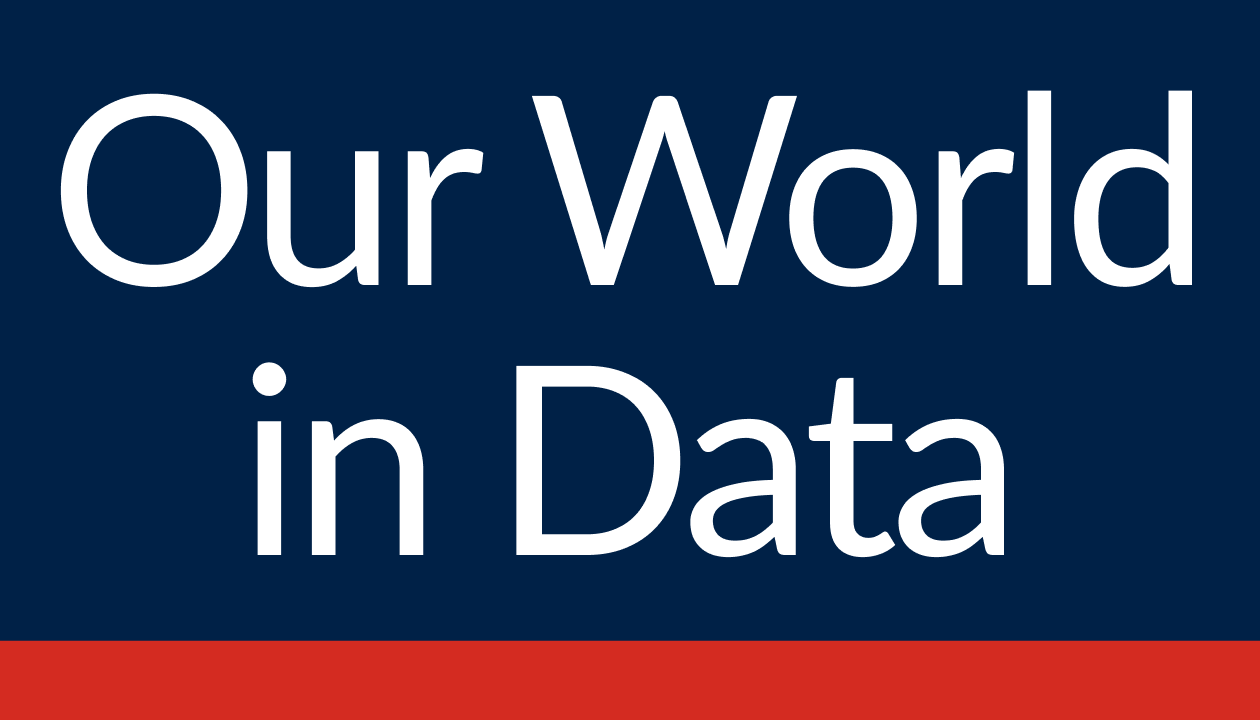

**Candidate : Giovanna Amorim**

# Data analysis exercise: Our World in Data Junior Data Scientist application


## Development notes 

- To kick off the project as suggested in the program, I reached the UN website and downloaded the dataset which can be found on the following link: https://population.un.org/wpp/Download/Standard/Population/
To optimize time, I quickly deleted the unnecessary worksheets from the original Excel, remaining only the *Population Estimates observations* and downloaded the updated dataset in CSV. 


- After reading the dataset and extracting information about its structure, I started to filter the raw data into the variables asked, such as year of observation and countries analyzed (United States of America and Uganda in 2019). 
 
- As soon as I followed the *new WHO Standard Population*, I needed to merge the observations from age +85. So I summed them and created a new row called “+85”. This new standard was declared to avoid biased results while calculating age-specific death rates and crude death rates. 
On the dataset, the total population is distributed by a range of five years, with both sexes combined in thousands.
We can also notice that this line of observations is distinguished as an outlier since its values are much greater than the others and that’s the reason why.


- At this point, after handling data cleaning and standardizing the data, I included the *Table of age-specific death rates of COPD* that was displayed on the program and declared as “COPD”. I ran a code aiming to extract missing values, analyze their types and understand if data cleaning might need to be conducted, which it wasn’t in the end. After that, I internally merged both datasets.


- As soon as I was ready to run the modeling, I started doing the **Calculation of the Age-standardized Rate**. After reading articles about it I realized I would need to extract the weight in percentage of each country’s sampling, and so I did. Afterwards, I made the multiplication as required.


- Time for generating the last outcome, developing the **Calculation of the Crude Death Rates for COPD**. In order to do that, I first found the death number of COPD based on the table provided and followed the steps as described on specialized websites. (sources are displayed at the bottom of the project). 


- Lastly, I created a table of results where I displayed the outcomes summed up, which can be found at the end of the project. 


# 1.Business understanding
## and table of content
The project aims to provide outcomes from a set of observations addressing death rates and calculating its **crude death rates** and **age-standardized death rates**.

Moreover, throughout the project, I will apply the typical CRISP-DM methodology providing the best analysis, data preparation, visualisation and report.

The program of the project follows by :

- Business understanding
- Data understanding
- Data preparation
- Modeling
- Evaluation
- Deployment


Information about the CRISP-DM methodology was extracted from :

https://www.sv-europe.com/crisp-dm-methodology/

**Resources will be displayed on the bottom of the project as well.** 



# 2. Data Understanding

### 2.1 Importing libraries and loading data

In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mtl
import warnings
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [221]:
df = pd.read_csv("WPP2022_POP_F02_1_POPULATION_5-YEAR_AGE_GROUPS_BOTH_SEXES.csv", encoding='latin-1',delimiter=';', low_memory=False)
df

,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
0,1,Estimates,WORLD,NaN,900,NaN,NaN,1.00,World,0,...,85 394,70 797,53 123,36 653,22 441,10 870,3 977,969,160,14
1,2,Estimates,WORLD,NaN,900,NaN,NaN,1.00,World,0,...,87 046,71 418,53 924,37 034,22 701,10 913,3 959,967,147,16
2,3,Estimates,WORLD,NaN,900,NaN,NaN,1.00,World,0,...,89 000,71 930,54 969,37 522,22 937,11 037,3 957,967,145,16
3,4,Estimates,WORLD,NaN,900,NaN,NaN,1.00,World,0,...,91 231,72 475,56 236,38 145,23 140,11 246,3 973,973,144,16
4,5,Estimates,WORLD,NaN,900,NaN,NaN,1.00,World,0,...,93 358,73 358,57 461,38 867,23 380,11 452,4 022,982,145,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20519,20520,Estimates,Wallis and Futuna Islands,2,876,WLF,WF,876.00,Country/Area,957,...,1,1,0,0,0,0,0,0,0,0
20520,20521,Estimates,Wallis and Futuna Islands,2,876,WLF,WF,876.00,Country/Area,957,...,1,1,0,0,0,0,0,0,0,0
20521,20522,Estimates,Wallis and Futuna Islands,2,876,WLF,WF,876.00,Country/Area,957,...,1,1,0,0,0,0,0,0,0,0
20522,20523,Estimates,Wallis and Futuna Islands,2,876,WLF,WF,876.00,Country/Area,957,...,1,1,1,0,0,0,0,0,0,0


In [222]:
def check_df(dataframe, head=5):
    print("---------- DATA SHAPE ----------")
    print(           )
    print(dataframe.shape)
    print(           )
    print("---------- DATA INFO ----------")
    print(           )
    print(dataframe.info())
    print(           )
    print("---------- CHECKING NULL VALUES ----------")
    print(           )

    missing_values = df.isnull().sum()
    # Calculate the percentage of missing values for each column
    percentage_missing = (missing_values / len(df)) * 100
    # Create a new DataFrame to display the results
    missing_data = pd.DataFrame({'Column': missing_values.index, 'Missing Percentage': percentage_missing})
    # Sort the DataFrame by the missing percentage in descending order
    missing_data = missing_data.sort_values('Missing Percentage', ascending=False)
    # Display the missing data DataFrame
    print(missing_data)
    print(           )

check_df(df)

---------- DATA SHAPE ----------

(20524, 32)

---------- DATA INFO ----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20524 entries, 0 to 20523
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Index                                 20524 non-null  int64  
 1   Variant                               20524 non-null  object 
 2   Region, subregion, country or area *  20524 non-null  object 
 3   Notes                                 5403 non-null   object 
 4   Location code                         20524 non-null  int64  
 5   ISO3 Alpha-code                       16992 non-null  object 
 6   ISO2 Alpha-code                       16920 non-null  object 
 7   SDMX code**                           20232 non-null  float64
 8   Type                                  20524 non-null  object 
 9   Parent code                           20524 non-null  int64  
 10  Ye

## 3. Data Preparation

In [223]:
df2019 = df[df['Year'] == 2019]
df2019

,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
69,70,Estimates,WORLD,NaN,900,NaN,NaN,1.00,World,0,...,372 484,319 587,260 374,182 095,124 404,83 165,43 535,16 658,3 918,504
142,143,Estimates,Sub-Saharan Africa,b,1834,NaN,NaN,202.00,SDG region,1828,...,24 441,18 541,13 661,9 360,5 618,2 805,1 098,319,64,11
214,215,Estimates,Northern Africa and Western Asia,NaN,1833,NaN,NaN,747.00,SDG region,1828,...,19 460,14 979,11 044,7 423,4 604,2 793,1 211,354,61,6
286,287,Estimates,Central and Southern Asia,NaN,1831,NaN,NaN,62.00,SDG region,1828,...,81 381,66 661,50 531,32 373,20 550,11 877,5 163,1 591,298,36
358,359,Estimates,Eastern and South-Eastern Asia,NaN,1832,NaN,NaN,753.00,SDG region,1828,...,136 183,120 106,101 575,68 085,46 547,31 027,16 394,6 115,1 404,208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20233,20234,Estimates,Samoa,NaN,882,WSM,WS,882.00,Country/Area,957,...,8,6,4,3,2,1,0,0,0,0
20305,20306,Estimates,Tokelau,34,772,TKL,TK,772.00,Country/Area,957,...,0,0,0,0,0,0,0,0,0,0
20377,20378,Estimates,Tonga,NaN,776,TON,TO,776.00,Country/Area,957,...,4,3,2,2,1,1,0,0,0,0
20449,20450,Estimates,Tuvalu,NaN,798,TUV,TV,798.00,Country/Area,957,...,1,0,0,0,0,0,0,0,0,0


In [224]:
df2019 = df2019[(df2019['Region, subregion, country or area *'] == 'United States of America') | 
                 (df2019['Region, subregion, country or area *'] == 'Uganda')]
df2019

,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
2953,2954,Estimates,Uganda,NaN,800,UGA,UG,800.00,Country/Area,910,...,687,500,353,197,93,44,15,4,1,0
18505,18506,Estimates,United States of America,30,840,USA,US,840.00,Country/Area,905,...,22 348,20 941,17 501,13 689,9 273,6 119,3 977,1 656,502,79


In [225]:
df2019.drop(['Index','Notes', 'Location code','ISO3 Alpha-code','ISO2 Alpha-code','SDMX code**','Parent code'], axis=1, inplace=True);
df2019

,Variant,"Region, subregion, country or area *",Type,Year,0-4,5-9,10-14,15-19,20-24,25-29,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
2953,Estimates,Uganda,Country/Area,"2,019.00",7 329,6 614,5 899,5 151,4 348,3 500,...,687,500,353,197,93,44,15,4,1,0
18505,Estimates,United States of America,Country/Area,"2,019.00",19 849,20 697,22 092,21 895,21 872,23 407,...,22 348,20 941,17 501,13 689,9 273,6 119,3 977,1 656,502,79


In [226]:
#cleaning the spaces between the numbers once it was bothring the application of the funcion "astype"
columns_to_clean = df2019.columns[4:-1]

# Remove spaces from the specified columns
df2019[columns_to_clean] = df2019[columns_to_clean].apply(lambda x: x.str.replace(' ', ''))

In [227]:
# Define the range of columns to convert to int64
columns_to_convert = df2019.columns[4:-1]

# Convert the specified columns to int64
df2019[columns_to_convert] = df2019[columns_to_convert].astype('int64')

In [228]:
numeric_columns = df2019.select_dtypes(include='number').columns
df2019['85+'] = df2019[numeric_columns].sum(axis=1)

In [229]:
df2019.drop(['85-89', '90-94', '95-99', '100+'], axis=1, inplace=True)
df2019

,Variant,"Region, subregion, country or area *",Type,Year,0-4,5-9,10-14,15-19,20-24,25-29,...,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+
2953,Estimates,Uganda,Country/Area,"2,019.00",7329,6614,5899,5151,4348,3500,...,1504,1235,953,687,500,353,197,93,44,"44,968.00"
18505,Estimates,United States of America,Country/Area,"2,019.00",19849,20697,22092,21895,21872,23407,...,20695,21244,21346,22348,20941,17501,13689,9273,6119,"336,261.00"


In [230]:
#transform columns into rows and vise versa
transposed_df = df2019.transpose()
transposed_df['Age group (years)'] = transposed_df.index
transposed_df.reset_index(drop=True, inplace=True)
transposed_df

,2953,18505,Age group (years)
0,Estimates,Estimates,Variant
1,Uganda,United States of America,"Region, subregion, country or area *"
2,Country/Area,Country/Area,Type
3,"2,019.00","2,019.00",Year
4,7329,19849,0-4
5,6614,20697,5-9
6,5899,22092,10-14
7,5151,21895,15-19
8,4348,21872,20-24
9,3500,23407,25-29


In [231]:
transposed_df.isnull().sum()

2953                 0
18505                0
Age group (years)    0
dtype: int64

In [232]:
# Rename the columns directly
transposed_df.columns = ['Estimates, Uganda, 2019', 'Estimates, United States of America, 2019','Age group (years)'] + list(transposed_df.columns[3:])

#dropping the useless rows 
transposed_df = transposed_df.drop(df.index[:4])

#moving the last column position 
temp_cols=transposed_df.columns.tolist()
new_cols=temp_cols[-1:] + temp_cols[:-1]
transposed_df=transposed_df[new_cols]

#view
transposed_df

,Age group (years),"Estimates, Uganda, 2019","Estimates, United States of America, 2019"
4,0-4,7329,19849
5,5-9,6614,20697
6,10-14,5899,22092
7,15-19,5151,21895
8,20-24,4348,21872
9,25-29,3500,23407
10,30-34,2619,22842
11,35-39,1903,22297
12,40-44,1504,20695
13,45-49,1235,21244


In [233]:
#transform the columns into float
transposed_df.iloc[:, 1:] = transposed_df.iloc[:, 1:].astype(float)
transposed_df

,Age group (years),"Estimates, Uganda, 2019","Estimates, United States of America, 2019"
4,0-4,"7,329.00","19,849.00"
5,5-9,"6,614.00","20,697.00"
6,10-14,"5,899.00","22,092.00"
7,15-19,"5,151.00","21,895.00"
8,20-24,"4,348.00","21,872.00"
9,25-29,"3,500.00","23,407.00"
10,30-34,"2,619.00","22,842.00"
11,35-39,"1,903.00","22,297.00"
12,40-44,"1,504.00","20,695.00"
13,45-49,"1,235.00","21,244.00"


In [234]:
#importing the COPD dataset as described on the agenda of the challange

# Dataset dictionary
COPD = {
    'Age group (years)': ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85+'],
    'Death rate, United States, 2019': [0.04, 0.02, 0.02, 0.02, 0.06, 0.11, 0.29, 0.56, 1.42, 4.00, 14.13, 37.22, 66.48, 108.66, 213.10, 333.06, 491.10, 894.45],
    'Death rate, Uganda, 2019': [0.40, 0.17, 0.07, 0.23, 0.38, 0.40, 0.75, 1.11, 2.04, 5.51, 13.26, 33.25, 69.62, 120.78, 229.88, 341.06, 529.31, 710.40]
}

# Create DataFrame
COPD = pd.DataFrame(COPD)

COPD


,Age group (years),"Death rate, United States, 2019","Death rate, Uganda, 2019"
0,0-4,0.04,0.40
1,5-9,0.02,0.17
2,10-14,0.02,0.07
3,15-19,0.02,0.23
4,20-24,0.06,0.38
5,25-29,0.11,0.40
6,30-34,0.29,0.75
7,35-39,0.56,1.11
8,40-44,1.42,2.04
9,45-49,4.00,5.51


In [235]:
def check_df(dataframe, head=5):
    print("---------- DATA SHAPE ----------")
    print(           )
    print(dataframe.shape)
    print(           )
    print("---------- DATA INFO ----------")
    print(           )
    print(dataframe.info())
    print(           )
    print("---------- CHECKING NULL VALUES ----------")
    print(           )

    missing_values = COPD.isnull().sum()
    # Calculate the percentage of missing values for each column
    percentage_missing = (missing_values / len(COPD)) * 100
    # Create a new DataFrame to display the results
    missing_data = pd.DataFrame({'Column': missing_values.index, 'Missing Percentage': percentage_missing})
    # Sort the DataFrame by the missing percentage in descending order
    missing_data = missing_data.sort_values('Missing Percentage', ascending=False)
    # Display the missing data DataFrame
    print(missing_data)
    print(           )

check_df(COPD)

---------- DATA SHAPE ----------

(18, 3)

---------- DATA INFO ----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age group (years)                18 non-null     object 
 1   Death rate, United States, 2019  18 non-null     float64
 2   Death rate, Uganda, 2019         18 non-null     float64
dtypes: float64(2), object(1)
memory usage: 560.0+ bytes
None

---------- CHECKING NULL VALUES ----------

                                                          Column  \
Age group (years)                              Age group (years)   
Death rate, United States, 2019  Death rate, United States, 2019   
Death rate, Uganda, 2019                Death rate, Uganda, 2019   

                                 Missing Percentage  
Age group (years)                              0.00  
Death rate, United State

In [236]:
internal = pd.merge(COPD, transposed_df, on='Age group (years)')
internal

,Age group (years),"Death rate, United States, 2019","Death rate, Uganda, 2019","Estimates, Uganda, 2019","Estimates, United States of America, 2019"
0,0-4,0.04,0.40,"7,329.00","19,849.00"
1,5-9,0.02,0.17,"6,614.00","20,697.00"
2,10-14,0.02,0.07,"5,899.00","22,092.00"
3,15-19,0.02,0.23,"5,151.00","21,895.00"
4,20-24,0.06,0.38,"4,348.00","21,872.00"
5,25-29,0.11,0.40,"3,500.00","23,407.00"
6,30-34,0.29,0.75,"2,619.00","22,842.00"
7,35-39,0.56,1.11,"1,903.00","22,297.00"
8,40-44,1.42,2.04,"1,504.00","20,695.00"
9,45-49,4.00,5.51,"1,235.00","21,244.00"


In [237]:
merged_df = internal

## 4. Modeling

## 4.1 Calculation of the Age-standardized Rate

Before building the final calculation it will demand extracting the weight in percentage of each line of group age of the sampling. These numbers will be used on the equation to find the Age-standardized Rate.

In [238]:
# Calculation of the weight of the population by age

#Uganda
# Sum of observations from the column "Estimates, Uganda, 2019"
total_observation = merged_df["Estimates, Uganda, 2019"].sum()

# The weight in percentage for each observation
merged_df["Weight Percentage Uganda"] = (merged_df["Estimates, Uganda, 2019"] / total_observation)

##### 
#United tates of America

# Sum of observations from the column "Estimates, Uganda, 2019"
total_observation1 = merged_df["Estimates, United States of America, 2019"].sum()

# The weight in percentage for each observation
merged_df["Weight Percentage United States of America"] = (merged_df["Estimates, United States of America, 2019"] / total_observation1)

#print
merged_df

,Age group (years),"Death rate, United States, 2019","Death rate, Uganda, 2019","Estimates, Uganda, 2019","Estimates, United States of America, 2019",Weight Percentage Uganda,Weight Percentage United States of America
0,0-4,0.04,0.40,"7,329.00","19,849.00",0.08,0.03
1,5-9,0.02,0.17,"6,614.00","20,697.00",0.08,0.03
2,10-14,0.02,0.07,"5,899.00","22,092.00",0.07,0.03
3,15-19,0.02,0.23,"5,151.00","21,895.00",0.06,0.03
4,20-24,0.06,0.38,"4,348.00","21,872.00",0.05,0.03
5,25-29,0.11,0.40,"3,500.00","23,407.00",0.04,0.04
6,30-34,0.29,0.75,"2,619.00","22,842.00",0.03,0.03
7,35-39,0.56,1.11,"1,903.00","22,297.00",0.02,0.03
8,40-44,1.42,2.04,"1,504.00","20,695.00",0.02,0.03
9,45-49,4.00,5.51,"1,235.00","21,244.00",0.01,0.03


Above I ran the equation where we can find the Age-standardized Rate from both countries Uganda and the United States of America based on the age-specific death rates of COPD. Afterwards, I displayed the outcomes obtained on the columns of the dataset. 
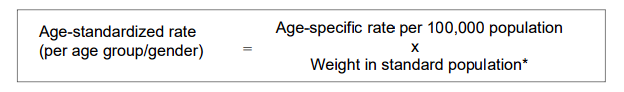

In [239]:
#Age-standardized rate from Uganda 

merged_df["Age-standardized rate from Uganda"] = (merged_df["Death rate, Uganda, 2019"] * merged_df["Weight Percentage Uganda"])

#Age-standardized rate from United States of America

merged_df["Age-standardized rate from United States of America"] = (merged_df["Death rate, United States, 2019"] * merged_df["Weight Percentage United States of America"])

#display result
merged_df

,Age group (years),"Death rate, United States, 2019","Death rate, Uganda, 2019","Estimates, Uganda, 2019","Estimates, United States of America, 2019",Weight Percentage Uganda,Weight Percentage United States of America,Age-standardized rate from Uganda,Age-standardized rate from United States of America
0,0-4,0.04,0.40,"7,329.00","19,849.00",0.08,0.03,0.03,0.00
1,5-9,0.02,0.17,"6,614.00","20,697.00",0.08,0.03,0.01,0.00
2,10-14,0.02,0.07,"5,899.00","22,092.00",0.07,0.03,0.00,0.00
3,15-19,0.02,0.23,"5,151.00","21,895.00",0.06,0.03,0.01,0.00
4,20-24,0.06,0.38,"4,348.00","21,872.00",0.05,0.03,0.02,0.00
5,25-29,0.11,0.40,"3,500.00","23,407.00",0.04,0.04,0.02,0.00
6,30-34,0.29,0.75,"2,619.00","22,842.00",0.03,0.03,0.02,0.01
7,35-39,0.56,1.11,"1,903.00","22,297.00",0.02,0.03,0.02,0.02
8,40-44,1.42,2.04,"1,504.00","20,695.00",0.02,0.03,0.03,0.04
9,45-49,4.00,5.51,"1,235.00","21,244.00",0.01,0.03,0.08,0.13


Above I will generate the sum up of the outcomes.

In [240]:
ASRu = (merged_df["Death rate, Uganda, 2019"].sum() * merged_df["Weight Percentage Uganda"].sum())
ASRa = (merged_df["Death rate, United States, 2019"].sum() * merged_df["Weight Percentage United States of America"].sum())

## 4.2 Calculation of the Crude Death Rates for COPD

The CDR are followed by ‘the total number of deaths to residents in a specified geographic area (country, state, county, etc.) divided by the total population for the same geographic area (for a specified time period, usually a calendar year) and multiplied by 100,000.’ The equation is based on the sampling of 100,00, the same range as I have been working on since the beginning of the project.

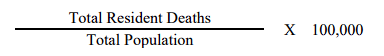

In [241]:
pd.options.display.float_format = "{:,.2f}".format

In [242]:
#Fiding death number of COPD in Uganda in 2019
deathCOPDUganda = (merged_df["Death rate, Uganda, 2019"] * merged_df["Estimates, Uganda, 2019"]/100000)

#Fiding death number of COPD in USA in 2019
deathCOPDUSA = (merged_df["Death rate, United States, 2019"] * merged_df["Estimates, United States of America, 2019"]/100000)

#Building the equation 
#Crude Death Rates for COPD Uganda
merged_df["Crude Death Rates Uganda"] = (deathCOPDUganda / merged_df["Estimates, Uganda, 2019"]*100000)

#Crude Death Rates for COPD USA
merged_df["Crude Death Rates The United States of America"] = (deathCOPDUSA / merged_df["Estimates, United States of America, 2019"]*100000)
merged_df

,Age group (years),"Death rate, United States, 2019","Death rate, Uganda, 2019","Estimates, Uganda, 2019","Estimates, United States of America, 2019",Weight Percentage Uganda,Weight Percentage United States of America,Age-standardized rate from Uganda,Age-standardized rate from United States of America,Crude Death Rates Uganda,Crude Death Rates The United States of America
0,0-4,0.04,0.40,"7,329.00","19,849.00",0.08,0.03,0.03,0.00,0.40,0.04
1,5-9,0.02,0.17,"6,614.00","20,697.00",0.08,0.03,0.01,0.00,0.17,0.02
2,10-14,0.02,0.07,"5,899.00","22,092.00",0.07,0.03,0.00,0.00,0.07,0.02
3,15-19,0.02,0.23,"5,151.00","21,895.00",0.06,0.03,0.01,0.00,0.23,0.02
4,20-24,0.06,0.38,"4,348.00","21,872.00",0.05,0.03,0.02,0.00,0.38,0.06
5,25-29,0.11,0.40,"3,500.00","23,407.00",0.04,0.04,0.02,0.00,0.40,0.11
6,30-34,0.29,0.75,"2,619.00","22,842.00",0.03,0.03,0.02,0.01,0.75,0.29
7,35-39,0.56,1.11,"1,903.00","22,297.00",0.02,0.03,0.02,0.02,1.11,0.56
8,40-44,1.42,2.04,"1,504.00","20,695.00",0.02,0.03,0.03,0.04,2.04,1.42
9,45-49,4.00,5.51,"1,235.00","21,244.00",0.01,0.03,0.08,0.13,5.51,4.00


Above I will generate the sum up of the outcomes.

In [243]:
CDRu = deathCOPDUganda.sum() / merged_df["Estimates, Uganda, 2019"].sum() * 100000
CDRa = deathCOPDUSA.sum() / merged_df["Estimates, United States of America, 2019"].sum() *100000

# 5. Evaluation

By all means of analysis and comparison, I will display a table where the outcomes summed up can be read.


In [244]:
from tabulate import tabulate

In [245]:
# Create a list of lists for the table data
table_data = [
    ["Age-standardized rate from Uganda", ASRu],
    ["Age-standardized rate from United States of America", ASRa],
    ["Crude Death Rates Uganda", CDRu],
    ["Crude Death Rates The United States of America", CDRa]
]

# Print the table
print(tabulate(table_data, headers=["Variable", "Outcome"], tablefmt="grid"))

+-----------------------------------------------------+-----------+
| Variable                                            |   Outcome |
+=====================================================+===========+
| Age-standardized rate from Uganda                   |  2058.62  |
+-----------------------------------------------------+-----------+
| Age-standardized rate from United States of America |  2164.74  |
+-----------------------------------------------------+-----------+
| Crude Death Rates Uganda                            |   366.123 |
+-----------------------------------------------------+-----------+
| Crude Death Rates The United States of America      |   473.15  |
+-----------------------------------------------------+-----------+


# Resources 


- CRISP-DM methodology
https://www.sv-europe.com/crisp-dm-methodology/


- Dataset: UNI Total population (both sexes combined) by five-year age group.
https://population.un.org/wpp/Download/Standard/Population/


- AGE STANDARDIZATION OF RATES: A NEW WHO STANDARD
https://cdn.who.int/media/docs/default-source/gho-documents/global-health-estimates/gpe_discussion_paper_series_paper31_2001_age_standardization_rates.pdf


- Calculation of the Age-standardized Rate
https://www3.paho.org/hq/dmdocuments/2012/PAHO-Age-standardized-mortality-rates-2009.pdf


- Crude Rate Calculations
https://www.cdc.gov/injury/wisqars/mapping_help/crude_rate.html

- CRUDE DEATH RATE 
https://www-doh.state.nj.us/doh-shad/view/sharedstatic/CrudeDeathRate.pdf

